In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [52]:
df = pd.read_csv('../../data/data2/clean_2/good_steps.csv')
df=df[df.time_from_previous>0]

In [53]:
df2 = df.loc[np.abs(stats.zscore(df['time_from_previous'])) < 3]

<AxesSubplot:xlabel='distance_x', ylabel='time_from_previous'>

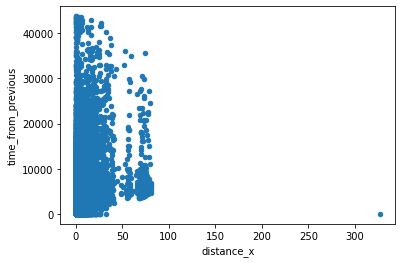

In [55]:
df2.plot(x='distance_x', y='time_from_previous', kind='scatter')

In [8]:
df2=df2.groupby('distance_x').median().reset_index()

In [41]:
df2 = df2.loc[np.abs(stats.zscore(df2['time_from_previous'])) < 3]

In [42]:
def metrics(y_pred, y_test):
    return {
        'MSE' : mean_squared_error(y_pred,y_test),
        'MAE' : mean_absolute_error(y_pred,y_test),
        'SQRT_MSE' : np.sqrt(mean_squared_error(y_pred,y_test)),
        'R2_SCORE': r2_score(y_test,y_pred)
    }

In [43]:
y=df2['time_from_previous']
X=df2.drop(columns=['time_from_previous'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [44]:
y=df2['time_from_previous']
X=df2.drop(columns=['time_from_previous'])

degree=2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
polyreg=make_pipeline(PolynomialFeatures(degree),Ridge())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [45]:
y_pred = polyreg.predict(X_test)

In [46]:
metrics(y_pred,y_test)

{'MSE': 9919181.517217454,
 'MAE': 2200.3993915517963,
 'SQRT_MSE': 3149.4732126527847,
 'R2_SCORE': 0.43570541905037863}

In [48]:
import pickle


In [49]:
filename = './model.pickle'
pickle.dump(model, open(filename, 'wb'))